In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/data/Flowers-Dataset.zip'

Archive:  /content/gdrive/MyDrive/data/Flowers-Dataset.zip
  inflating: flowers/daisy/14167534527_781ceb1b7a_n.jpg  
  inflating: flowers/daisy/14167543177_cd36b54ac6_n.jpg  
  inflating: flowers/daisy/14219214466_3ca6104eae_m.jpg  
  inflating: flowers/daisy/14221836990_90374e6b34.jpg  
  inflating: flowers/daisy/14221848160_7f0a37c395.jpg  
  inflating: flowers/daisy/14245834619_153624f836.jpg  
  inflating: flowers/daisy/14264136211_9531fbc144.jpg  
  inflating: flowers/daisy/14272874304_47c0a46f5a.jpg  
  inflating: flowers/daisy/14307766919_fac3c37a6b_m.jpg  
  inflating: flowers/daisy/14330343061_99478302d4_m.jpg  
  inflating: flowers/daisy/14332947164_9b13513c71_m.jpg  
  inflating: flowers/daisy/14333681205_a07c9f1752_m.jpg  
  inflating: flowers/daisy/14350958832_29bdd3a254.jpg  
  inflating: flowers/daisy/14354051035_1037b30421_n.jpg  
  inflating: flowers/daisy/14372713423_61e2daae88.jpg  
  inflating: flowers/daisy/14399435971_ea5868c792.jpg  
  inflating: flowers/daisy/14

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/flowers"

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [ ]:
x_train = train_data.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4246 images belonging to 5 classes.


In [ ]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [ ]:
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4246 files belonging to 5 classes.
Using 3397 files for training.


In [ ]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
seed=107,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4246 files belonging to 5 classes.
Using 849 files for validation.


In [ ]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

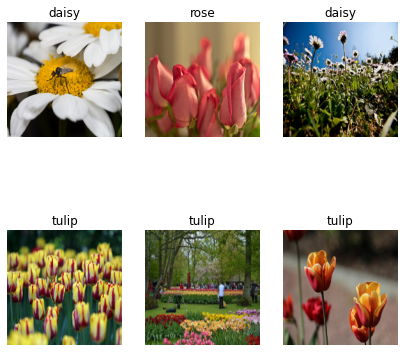

In [ ]:
plt.figure(figsize=(7, 7))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))

In [ ]:
model.add(Dense(5, activation = "softmax"))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
43/43 [==============================] - 22s 316ms/step - loss: 1.4012 - accuracy: 0.4383
Epoch 2/15
43/43 [==============================] - 14s 319ms/step - loss: 1.0878 - accuracy: 0.5669
Epoch 3/15
43/43 [==============================] - 14s 327ms/step - loss: 1.0095 - accuracy: 0.6121
Epoch 4/15
43/43 [==============================] - 14s 318ms/step - loss: 0.9744 - accuracy: 0.6100
Epoch 5/15
43/43 [==============================] - 14s 316ms/step - loss: 0.9350 - accuracy: 0.6333
Epoch 6/15
43/43 [==============================] - 14s 319ms/step - loss: 0.8913 - accuracy: 0.6512
Epoch 7/15
43/43 [==============================] - 14s 317ms/step - loss: 0.8562 - accuracy: 0.6625
Epoch 8/15
43/43 [==============================] - 14s 318ms/step - loss: 0.8349 - accuracy: 0.6783
Epoch 9/15
43/43 [==============================] - 14s 313ms/step - loss: 0.8267 - accuracy: 0.6851
Epoch 10/15
43/43 [==============================] - 13s 313ms/step - loss: 0.8397 - accura

In [ ]:
model.save("flowers.h1")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('/content/flowers.h1')

In [ ]:
daisy_img = image.load_img('/content/flowers/daisy/5547758_eea9edfd54_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)

In [ ]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

'sunflowers'

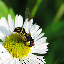

In [ ]:
daisy_img